In [71]:
using Pkg; Pkg.activate(".")
using Revise 
using ClimaAnalysis
using ClimaAtmos
import YAML
import Glob
using CairoMakie
import ClimaAnalysis.Visualize as viz
import ClimaAnalysis.Utils: kwargs

  Activating project at `~/Documents/Research/loss/ClimaAtmos.jl/calibration/experiments/reanalysis_forcing`


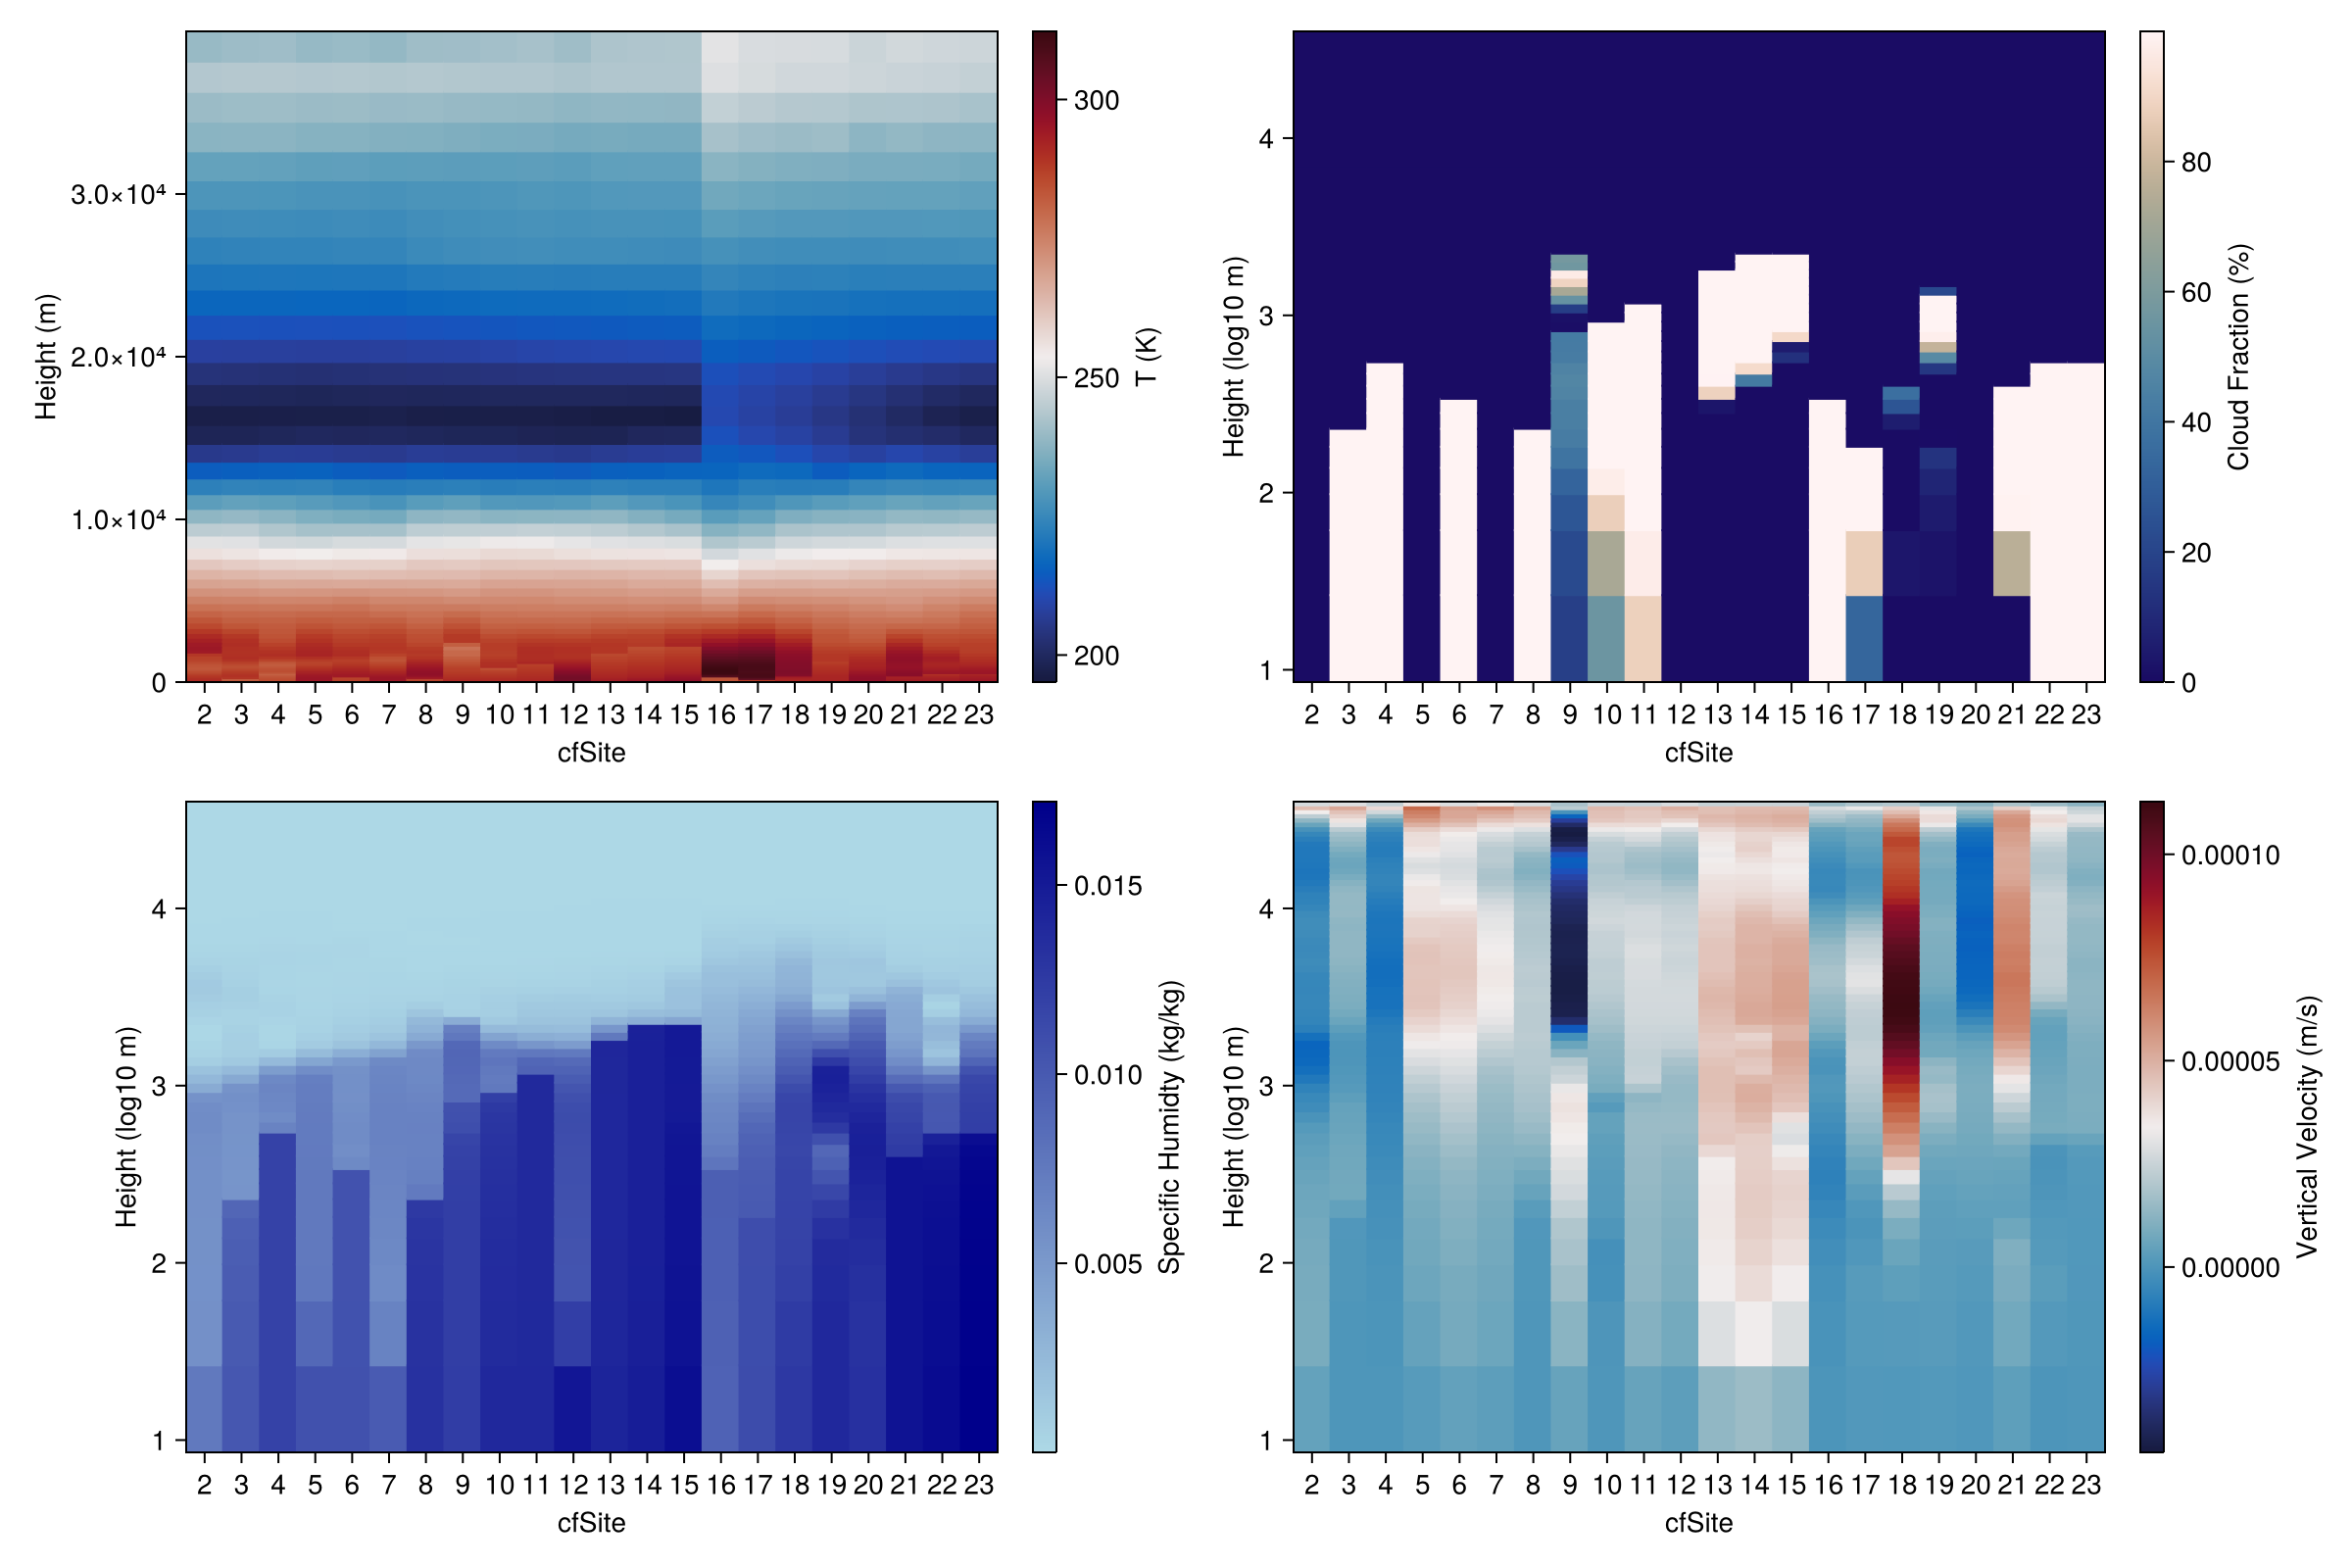

In [120]:
#fpaths = Glob.glob("output/era5_driven/*/output_active/")
# fig = CairoMakie.Figure()
# viz.plot!(fig, da, more_kwargs = Dict(:axis => kwargs(dim_on_y = true, yscale = log10)))
function cfdata(var)
    data = []
    z = nothing
    for site in 2:23            
        simdir = SimDir("output/era5_driven/site$site/output_active/")
        da = get(simdir; short_name = var)
        da = window(da, "time", left = 100 * 3600, right = 150 * 3600)
        da = average_time(da)
        da = slice(da, x = 0, y = 0)
        push!(data, da.data)
        if site ==2 
            z = da.dims["z"]
        end
    end
    return transpose(hcat(data...)), z
end

# data = []
# for site in 2:23
#     simdir = SimDir("output/era5_driven/site$site/output_active/")
#     da = get(simdir; short_name = "cl")
#     da = window(da, "time", left = 100 * 3600, right = 150 * 3600)
#     da = average_time(da)
#     da = slice(da, x = 0, y = 0)
#     push!(data, da.data)
# end

# da = get(SimDir("output/era5_driven/site2/output_active/"); short_name = "ta")
# da.dims
# # fig

# CairoMakie.heatmap(transpose(hcat(data...)))


fig = Figure(size = (1200, 800))
ax = Axis(fig[1, 1],
    xlabel = "cfSite",
    ylabel = "Height (m)",
    #yscale = log10,  # Set y-axis to log scale
    xticks = (2:23)  # Label x-axis with site numbers
)
t_dat, z = cfdata("ta")

# Plot the data (transpose since you want z as vertical and sites as horizontal)
hm = heatmap!(ax, 2:23, z, t_dat, colormap = :balance)

# Add colorbar
Colorbar(fig[1, 2], hm, label = "T (K)")

ax = Axis(fig[1, 3],
    xlabel = "cfSite",
    ylabel = "Height (log10 m)",
    xticks = (2:23)  # Label x-axis with site numbers
)

cl_dat, z = cfdata("cl")
hm = heatmap!(ax, 2:23, log10.(z), cl_dat, colormap = :lapaz)
Colorbar(fig[1, 4], hm, label = "Cloud Fraction (%)")

ax = Axis(fig[2, 1],
    xlabel = "cfSite",
    ylabel = "Height (log10 m)",
    xticks = (2:23)  # Label x-axis with site numbers
)

hus_dat, z = cfdata("hus")
hm = heatmap!(ax, 2:23, log10.(z), hus_dat, colormap = :blues)
Colorbar(fig[2,2], hm, label = "Specific Humidty (kg/kg)")

ax = Axis(fig[2, 3],
    xlabel = "cfSite",
    ylabel = "Height (log10 m)",
    xticks = (2:23)  # Label x-axis with site numbers
)

wa_dat, z = cfdata("wa")
hm = heatmap!(ax, 2:23, log10.(z), wa_dat, colormap = :balance)
Colorbar(fig[2,4], hm, label = "Vertical Velocity (m/s)")



# Display the plot
fig

In [ ]:
# let's repeat the above but for 1D variables

In [113]:
println(summary(SimDir("output/era5_driven/site23/output_active/")))

Output directory: output/era5_driven/site23/output_active/
Variables:
- rhoa
    inst (10m)
- taen
    inst (10m)
- pr
    inst (10m)
- waup
    inst (10m)
- hurvi
    inst (10m)
- wa
    inst (10m)
- prw
    inst (10m)
- clivi
    inst (10m)
- clwvi
    inst (10m)
- ua
    inst (10m)
- cli
    inst (10m)
- thetaaup
    inst (10m)
- hussfc
    inst (10m)
- tke
    max (10m)
    inst (10m)
- edt
    inst (10m)
- rlut
    inst (10m)
- thetaa
    inst (10m)
- evu
    inst (10m)
- husup
    inst (10m)
- detr
    inst (10m)
- arup
    inst (10m)
- strain
    inst (10m)
- hur
    inst (10m)
- rsutcs
    inst (10m)
- bgrad
    inst (10m)
- lmix
    inst (10m)
- cl
    inst (10m)
- hus
    inst (10m)
- rsut
    inst (10m)
- haup
    inst (10m)
- taup
    inst (10m)
- cliup
    inst (10m)
- entr
    inst (10m)
- thetaaen
    inst (10m)
- ta
    inst (10m)
- husv
    inst (10m)
- ha
    inst (10m)
- clvi
    inst (10m)
- clwup
    inst (10m)
- dsevi
    inst (10m)
- haen
    inst (10m)
- evspsbl